# Laporan Proyek Machine Learning - Damar Syarafi Ramadhan

Sistem Rekomendasi : Product Amazon

# Import

## Load Kagglehub

In [1]:
!pip install kagglehub -q

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-sales-dataset


## Import library and file

In [3]:
import os
import pandas as pd

csv_path = os.path.join(path, "amazon.csv")
# Baca dataset
df = pd.read_csv(csv_path)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter
from textblob import TextBlob

import string
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

#Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#Model
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Dataset Amazon Sales yang diambil dari Kaggle berisi informasi lengkap terkait produk dan ulasan pengguna, dengan struktur variabel sebagai berikut:
- product_id: ID unik produk
- product_name: Nama produk
- category: Kategori produk
- discounted_price: Harga produk setelah diskon
- actual_price: Harga asli produk sebelum diskon
- discount_percentage: Persentase diskon produk
- rating: Rating rata-rata produk
- rating_count: Jumlah pengguna yang memberikan rating
- about_product: Deskripsi produk
- user_id: ID pengguna yang memberikan review
- user_name: Nama pengguna yang memberikan review
- review_id: ID review pengguna
- review_title: Judul singkat review
- review_content: Isi review panjang
- img_link: Link gambar produk
- product_link: Link resmi produk di website Amazon

## Statistik dasar dataset

In [7]:
df.describe().T

,count,unique,top,freq
product_id,1465,1351,B083342NKJ,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,28,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


## Cek Nilai Null dan Duplicate

In [8]:
df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [9]:
df.duplicated().sum()

np.int64(0)

# Data Preparation

## Handling Missing Value & Duplicate

In [10]:
clean_df = df.copy()

In [11]:
clean_df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [12]:
clean_df.loc[(clean_df['rating_count'].isna())]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [13]:
clean_df['rating_count'].fillna(method='bfill', inplace=True) # Fill NaN with 0

In [14]:
clean_df.duplicated().sum()

np.int64(0)

Pengolahan Drop menggunakan imputasi dengan value sebelumnya.

## Feature Engineering

In [15]:
# Convert 'discounted_price' and 'actual_price' by removing currency symbol and converting to float
clean_df['discounted_price'] = clean_df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
clean_df['actual_price'] = clean_df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Convert 'discount_percentage' by removing '%' and converting to float
clean_df['discount_percentage'] = clean_df['discount_percentage'].astype(str).str.replace('%', '').astype(float)

# Convert 'rating' to float
clean_df['rating'] = pd.to_numeric(clean_df['rating'].astype(str).str.replace('|', ''), errors='coerce')

# Convert 'rating_count' by removing commas and converting to int
clean_df['rating_count'] = clean_df['rating_count'].astype(str).str.replace(',', '').astype(int)

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1465 non-null   int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

## Text Cleaning

In [17]:
#Extracting the top-level category
print(f'Sebelum ekstraksi kategori utama {clean_df["category"].loc[0]}')
clean_df['category'] = clean_df['category'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else x)
print(f'setelah ekstraksi kategori utama {clean_df["category"].loc[0]}')

Sebelum ekstraksi kategori utama Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
setelah ekstraksi kategori utama Computers&Accessories


In [18]:
# Cleaning and preprocessing text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text

    # Remove stopwords and apply lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            filtered_words.append(lemmatizer.lemmatize(word))

    return ' '.join(filtered_words)

# Assuming df is your DataFrame and it has been previously loaded
# Apply the clean_text function to the DataFrame columns
clean_df['product_name'] = clean_df['product_name'].apply(clean_text)
clean_df['about_product'] = clean_df['about_product'].apply(clean_text)
clean_df['review_title'] = clean_df['review_title'].apply(clean_text)
clean_df['review_content'] = clean_df['review_content'].apply(clean_text)
clean_df['category'] = clean_df['category'].apply(clean_text)
clean_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,wayona nylon braided usb lightning fast chargi...,computersaccessories,399.0,1099.0,64.0,4.2,24269,high compatibility compatible iphone xxsmaxxr ...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",satisfiedcharging really fastvalue moneyproduc...,look durable charging fine toono complainschar...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,ambrane unbreakable w fast charging braided ty...,computersaccessories,199.0,349.0,43.0,4.0,43994,compatible type c enabled device android smart...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",good braided cable type c devicegood quality p...,ordered cable connect phone android auto car c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,sounce fast phone charging cable data sync usb...,computersaccessories,199.0,1899.0,90.0,3.9,7928,fast charger data syncwith builtin safety proc...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",good speed earlier versionsgood productworking...,quite durable sturdy good nice productworking ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boat deuce usb typec micro usb stress resistan...,computersaccessories,329.0,699.0,53.0,4.2,94363,boat deuce usb cable compatible smartphones ta...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productgood onenicereally nice productver...,good productlong wirecharges goodnicei bought ...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,portronics konnect l fast charging pin usb cab...,computersaccessories,154.0,399.0,61.0,4.2,16905,charge sync function cable come charging data ...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",good originaldecentgood one secondary usebest ...,bought instead original apple work r fast appl...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [19]:
print(f'Contoh Sebelum Text Cleaning: {df["product_name"].loc[0]}')
print(f'Contoh Setelah Text Cleaning: {clean_df["product_name"].loc[0]}')

Contoh Sebelum Text Cleaning: Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)
Contoh Setelah Text Cleaning: wayona nylon braided usb lightning fast charging data sync cable compatible iphone x ipad air pro mini ft pack grey


## IQR

**IQR** adalah konsep statistik yang terkait dengan distribusi data, dan penggunaannya untuk outlier adalah salah satu aplikasi utamanya. IQR mewakili rentang nilai yang mencakup 50% bagian tengah data Anda ketika diurutkan. Ini adalah ukuran penyebaran data yang "tahan" terhadap nilai-nilai ekstrem.

- Kuartil Pertama (Q1): Nilai di bawahnya terletak 25% data.
- Kuartil Ketiga (Q3): Nilai di bawahnya terletak 75% data (atau 25% data terletak di atasnya).
- IQR: Adalah perbedaan antara Kuartil Ketiga (Q3) dan Kuartil Pertama (Q1). IQR = Q3 - Q1

In [20]:
numeric_cols = clean_df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count'],
      dtype='object')

In [21]:
# Cek Outlier dengan IQR Outlier
def outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers

print('Before Drop Outliers')
data_outlier = {}
for col in numeric_cols:
    data_outlier[col] = outlier_iqr(clean_df[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

Before Drop Outliers
Outlier (discounted_price): 217 outliers
Outlier (actual_price): 213 outliers
Outlier (discount_percentage): 0 outliers
Outlier (rating): 74 outliers
Outlier (rating_count): 141 outliers


In [22]:
#Drop Outliers
def dropOutlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df = np.where(df > upper_bound, upper_bound, df)
    df = np.where(df < lower_bound, lower_bound, df)
    return df

for col in numeric_cols:
    clean_df[col] = dropOutlier(clean_df[col])

print('After Drop Outliers')
data_outlier = {}
for col in numeric_cols:
    data_outlier[col] = outlier_iqr(clean_df[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

After Drop Outliers
Outlier (discounted_price): 0 outliers
Outlier (actual_price): 0 outliers
Outlier (discount_percentage): 0 outliers
Outlier (rating): 0 outliers
Outlier (rating_count): 0 outliers


# EDA

## Analisis Sentimen

In [23]:
#Classify sentiment from review content
def sentiment_analysis(text):
    analysis = TextBlob(text)
    #threshold for positive and negative sentiments
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

#Applying sentiment analysis to the review content
reviews = clean_df['review_content']
reviews_sentiments = reviews.apply(sentiment_analysis)
clean_df['Sentiment'] = reviews_sentiments

In [24]:
label_encoder = LabelEncoder()

# Fitting the encoder and transforming the 'Sentiment' column
clean_df['Encoded_Sentiment'] = label_encoder.fit_transform(clean_df['Sentiment'])

In [25]:
# Finding examples of positive, neutral, and negative sentiments
positive_example = clean_df[clean_df['Sentiment'] == 'Positive'].iloc[0]['review_content']
neutral_example = clean_df[clean_df['Sentiment'] == 'Neutral'].iloc[0]['review_content']
negative_example = clean_df[clean_df['Sentiment'] == 'Negative'].iloc[0]['review_content']

print("Example of sentiment review: ")
example_reviews = pd.DataFrame({
    "Sentiment": ["Positive", "Neutral", "Negative"],
    "Review": [positive_example, neutral_example, negative_example]
})
example_reviews

Example of sentiment review: 


,Sentiment,Review
0,Positive,look durable charging fine toono complainschar...
1,Neutral,overall goodtv picture ok smart bettersound lo...
2,Negative,value moneyusually gdgood productgoodquality p...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


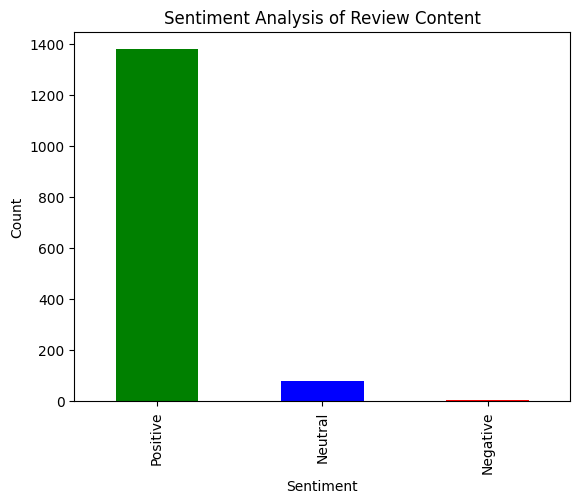

In [26]:
# Counting the occurrences of each sentiment
sentiment_counts = reviews_sentiments.value_counts()

sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], title='Sentiment Analysis of Review Content')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Insight yang didapatkan :**
- Terdapat pattern lonjakan yang sangat signifikan penjualan antara bulan November - Desember yang kemungkinan disebabkan promo akhir tahun.

## Top categories berdasarkan Jumlah Produk

In [27]:
category_count = clean_df.groupby('category')['product_id'].count().reset_index()
category_count = category_count.sort_values(by='product_id', ascending=False)
category_count

,category,product_id
2,electronics,526
1,computersaccessories,453
5,homekitchen,448
7,officeproducts,31
6,musicalinstruments,2
4,homeimprovement,2
0,carmotorbike,1
3,healthpersonalcare,1
8,toysgames,1


In [28]:
# Rata-rata Rating Setiap Kategori
rating_cat = clean_df.groupby('category')['rating'].mean().reset_index()
rating_cat= rating_cat.sort_values(by='rating', ascending=False)
rating_cat

,category,rating
7,officeproducts,4.309677
8,toysgames,4.300000
4,homeimprovement,4.250000
1,computersaccessories,4.158720
2,electronics,4.091065
5,homekitchen,4.062864
3,healthpersonalcare,4.000000
6,musicalinstruments,3.900000
0,carmotorbike,3.800000


## Rata-rata diskon Setiap Kategori Product

In [29]:
# Rata-rata Diskon Setiap Kategori
category_disc = clean_df.groupby('category')['discounted_price'].mean().reset_index()
category_disc= category_disc.sort_values(by='discounted_price', ascending=False)
category_disc

,category,discounted_price
0,carmotorbike,2339.000000
2,electronics,1995.709125
5,homekitchen,1757.374576
3,healthpersonalcare,899.000000
1,computersaccessories,672.941766
6,musicalinstruments,638.000000
4,homeimprovement,337.000000
7,officeproducts,301.580645
8,toysgames,150.000000


In [30]:
# Rata-rata Diskon Setiap Kategori (Persentase)
per_category_disc = clean_df.groupby('category')['discount_percentage'].mean().reset_index()
per_category_disc= per_category_disc.sort_values(by='discount_percentage', ascending=False)
print(f'Rata-rata Diskon Setiap Kategori {per_category_disc}')
px.histogram(per_category_disc, x='category', y='discount_percentage', color='category')

Rata-rata Diskon Setiap Kategori                category  discount_percentage
4       homeimprovement            57.500000
1  computersaccessories            54.024283
3    healthpersonalcare            53.000000
2           electronics            50.828897
6    musicalinstruments            46.000000
0          carmotorbike            42.000000
5           homekitchen            40.120536
7        officeproducts            12.354839
8             toysgames             0.000000


## Heatmap Correlation

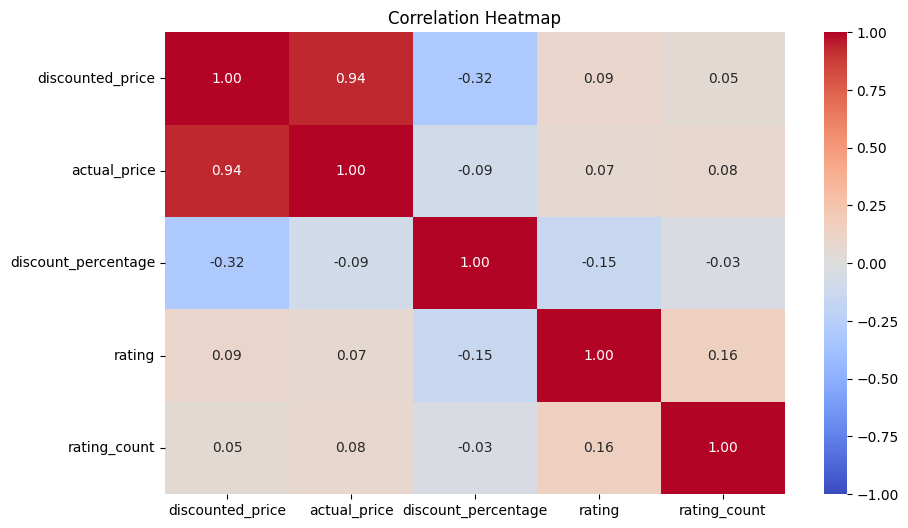

In [31]:
# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(clean_df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Insight yang didapatkan :**
- Pengerahan budget marketing sama rata pada semua kategori product.

# Model

Karena kita akan membuat model **Predictive Modeling** **Time Series** yang berhubungan dengan mengetahui data perkiraan terkait apa yang mungkin terjadi beberapa waktu mendatang.

## Term Frequency and Inverse Document Frequency

Menerapkan TF-IDF (Term Frequency dan Inverse Document Frequency) Sasaran utamanya adalah mengevaluasi pentingnya sebuah kata pada sebuah dokumen. Biasanya, terdiri dari:
- Term Frequency (TF): mengukur seberapa sering sebuah istilah muncul dalam sebuah dokumen. Dihitung dengan membagi jumlah kemunculan sebuah istilah dalam sebuah dokumen dengan jumlah total istilah dalam dokumen tersebut.
- Inverse Document Frequency (IDF): mengukur pentingnya istilah di seluruh korpus. Dihitung dengan mengambil logaritma dari jumlah total dokumen dibagi dengan jumlah dokumen yang memuat istilah tersebut.

Untuk menerapkan TF-IDF secara efektif pada kumpulan data ini, mari pertimbangkan penggabungan teks dari product_name, category, about_product untuk membentuk representasi komprehensif dari setiap produk.

In [32]:
# Dropping irrelevant Features
drop_col = ['discounted_price', 'actual_price', 'discount_percentage', 'review_id', 'review_title',
                   'user_name', 'img_link', 'product_link']
drop_df = clean_df.drop(columns=drop_col)
drop_df.head()

,product_id,product_name,category,rating,rating_count,about_product,user_id,review_content,Sentiment,Encoded_Sentiment
0,B07JW9H4J1,wayona nylon braided usb lightning fast chargi...,computersaccessories,4.2,24269.0,high compatibility compatible iphone xxsmaxxr ...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",look durable charging fine toono complainschar...,Positive,2
1,B098NS6PVG,ambrane unbreakable w fast charging braided ty...,computersaccessories,4.0,41526.0,compatible type c enabled device android smart...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",ordered cable connect phone android auto car c...,Positive,2
2,B096MSW6CT,sounce fast phone charging cable data sync usb...,computersaccessories,3.9,7928.0,fast charger data syncwith builtin safety proc...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",quite durable sturdy good nice productworking ...,Positive,2
3,B08HDJ86NZ,boat deuce usb typec micro usb stress resistan...,computersaccessories,4.2,41526.0,boat deuce usb cable compatible smartphones ta...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",good productlong wirecharges goodnicei bought ...,Positive,2
4,B08CF3B7N1,portronics konnect l fast charging pin usb cab...,computersaccessories,4.2,16905.0,charge sync function cable come charging data ...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",bought instead original apple work r fast appl...,Positive,2


In [33]:
#Instantiate TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
vectorizer.fit(drop_df['category'])

# Mapping array dari fitur index integer ke fitur nama
vectorizer.get_feature_names_out()

array(['carmotorbike', 'computersaccessories', 'electronics',
       'healthpersonalcare', 'homeimprovement', 'homekitchen',
       'musicalinstruments', 'officeproducts', 'toysgames'], dtype=object)

In [34]:
tfidf_matrix = vectorizer.fit_transform(drop_df['category'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
# This block of code should be moved AFTER the cell where tfidf_matrix is calculated
# using the 'combined_text'.
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=vectorizer.get_feature_names_out(),
    index=drop_df.product_name).sample(5, axis=1).sample(10, axis=0)

,musicalinstruments,healthpersonalcare,electronics,homeimprovement,officeproducts
product_name,,,,,
generic ultramini bluetooth csr usb dongle adapter window computer blackgolden,0.0,0.0,0.0,0.0,0.0
oneplus nord g gray shadow gb ram gb storage,0.0,0.0,1.0,0.0,0.0
oneplus cm inch u series k led smart android tv u black,0.0,0.0,1.0,0.0,0.0
fireboltt visionary amoled bluetooth calling smartwatch pixel resolution sport mode tws connection voice assistance spo heart rate monitoring,0.0,0.0,1.0,0.0,0.0
iqoo z w vivo raven black gb ram gb storage fhd amoled display charge min indisplay fingerprint scanning,0.0,0.0,1.0,0.0,0.0
portronics konnect l fast charging pin usb cable charge sync function iphone ipad grey,0.0,0.0,0.0,0.0,0.0
lapster accessory power cable cord pin laptop adapter tape recorder,0.0,0.0,0.0,0.0,0.0
usha ei heavy weight watt dry iron golden american heritage soleplate kgwhite,0.0,0.0,0.0,0.0,0.0
usha armor arwb w dry iron black weilburger soleplate purple,0.0,0.0,0.0,0.0,0.0


## Content-based Approach

In [36]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [37]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=drop_df['product_name'], columns=drop_df['product_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1465, 1465)


product_name,milton smart egg boiler watt transparent silver grey boil egg,brand conquer otg sd card reader usb type c usb micro usb memory card portable card reader compatible tf sd micro sd sdhc sdxc mmc rsmmc micro sdxc,nokia single sim keypad mobile phone wireless fm radio blue,havells glydo watt dry iron american heritage non stick sole plate aerodynamic design easy grip temperature knob year warranty charcoal blue,boat bassheads ear wired earphone micactive black
product_name,,,,,
wecool moonwalk enc true wireless ear earbuds mic titanium driver rich bass experience hour play time type c fast charging low latency bt ipx deep bass black,0.0,0.0,1.0,0.0,1.0
bajaj new shakti neo l vertical storage water heater geyser litre star bee rated heater water heating titanium armour swirl flow technology glasslined tankwhite yr warranty,1.0,0.0,0.0,1.0,0.0
airtel digitaltv dth television setup box remote compatible sd hd recording black,0.0,0.0,1.0,0.0,1.0
esquire laundry basket brown ltr capacityplastic,1.0,0.0,0.0,1.0,0.0
xiaomi mi dualband ethernet mbps speed router ghz ghz frequencymb ram dualcore thread cpu omni directional antennami wifi appparental control anti hackingrepeater white,0.0,1.0,0.0,0.0,0.0
firestick remote,0.0,0.0,1.0,0.0,1.0
ptron solero mb micro usb data charging cable made india mbps data sync strong durable meter nylon braided usb cable micro usb device black,0.0,1.0,0.0,0.0,0.0
ambrane typec micro usb cable w fast charging mbps high data pd technology quick charge compatible typec micro usb device abdc black,0.0,1.0,0.0,0.0,0.0
amazonbasics cm inch k ultra hd smart led fire tv abups black,0.0,0.0,1.0,0.0,1.0


In [38]:
def product_recommendations(nama_product, similarity_data=cosine_sim_df, items=drop_df[['product_name', 'category']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_product].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_product agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_product, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [39]:
contoh_product = drop_df['product_name'].sample().item()
print(contoh_product)

orpat hhbe watt hand blender white


In [40]:
product_recommendations(contoh_product)

,product_name,category
0,borosil jumbo watt grill sandwich maker black,homekitchen
1,homeistic applience instant electric water hea...,homekitchen
2,havells instanio litre storage water heater fl...,homekitchen
3,agaro rapid watt litre wet dry vacuum cleaner ...,homekitchen
4,kitchenwell pc plastic food snack bag pouch cl...,homekitchen


## Collaborative Recommendation

In [41]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = drop_df['user_id'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  ['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ', 'AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ', 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q', 'AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q', 'AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDS

In [42]:
# Mengubah placeID menjadi list tanpa nilai yang sama
product_ids = drop_df['product_id'].unique().tolist()
print('list productID: ', product_ids)

# Melakukan proses encoding placeID
product_to_product_encoded = {x: i for i, x in enumerate(product_ids)}
print('encoded productID : ', product_to_product_encoded)

# Melakukan proses encoding angka ke placeID
product_encoded_to_product = {i: x for i, x in enumerate(product_ids)}
print('encoded angka ke productID: ', product_encoded_to_product)

list productID:  ['B07JW9H4J1', 'B098NS6PVG', 'B096MSW6CT', 'B08HDJ86NZ', 'B08CF3B7N1', 'B08Y1TFSP6', 'B08WRWPM22', 'B08DDRGWTJ', 'B008IFXQFU', 'B082LZGK39', 'B08CF3D7QR', 'B0789LZTCJ', 'B07KSMBL2H', 'B085DTN6R2', 'B09KLVMZ3B', 'B083342NKJ', 'B0B6F7LX4C', 'B082LSVT4B', 'B08WRBG3XW', 'B08DPLCM6T', 'B09C6HXFC1', 'B085194JFL', 'B09F6S8BT6', 'B09NHVCHS9', 'B0B1YVCJ2Y', 'B01M4GGIVU', 'B08B42LWKN', 'B094JNXNPV', 'B09W5XR9RT', 'B077Z65HSD', 'B00NH11PEY', 'B09CMM3VGK', 'B08QSC1XY8', 'B008FWZGSG', 'B0B4HJNPV4', 'B08Y1SJVV5', 'B07XLCFSSN', 'B09RZS1NQT', 'B0B3MMYHYW', 'B09C6HWG18', 'B00NH11KIK', 'B09JPC82QC', 'B07JW1Y6XV', 'B07KRCW6LZ', 'B09NJN8L25', 'B07XJYYH7L', 'B002PD61Y4', 'B014I8SSD0', 'B09L8DSSFH', 'B07232M876', 'B07P681N66', 'B0711PVX6Z', 'B082T6V3DT', 'B07MKFNHKG', 'B0BFWGBX61', 'B01N90RZ4M', 'B0088TKTY2', 'B09Q5SWVBJ', 'B0B4DT8MKT', 'B08CDKQ8T6', 'B07B275VN9', 'B0B15CPR37', 'B0994GFWBH', 'B01GGKZ0V6', 'B09F9YQQ7B', 'B014I8SX4Y', 'B09Q8HMKZX', 'B0B9XN9S3W', 'B07966M8XH', 'B01GGKYKQM', 'B

In [43]:
# Mapping userID ke dataframe user
drop_df['user'] = drop_df['user_id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
drop_df['product'] = drop_df['product_id'].map(product_to_product_encoded)

drop_df[['user', 'product']]

,user,product
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
1460,1189,1346
1461,1190,1347
1462,1191,1348
1463,1192,1349


In [44]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_product = len(product_encoded_to_product)
print(num_product)

# Mengubah rating menjadi nilai float
# drop_df['rating'] = drop_df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(drop_df['rating'])

# Nilai maksimal rating
max_rating = max(drop_df['rating'])

print('Number of User: {}, Number of Products: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_product, min_rating, max_rating
))

1194
1351
Number of User: 1194, Number of Products: 1351, Min Rating: 3.5500000000000003, Max Rating: 4.75


In [45]:
# Mengacak dataset
sampled_df = drop_df.sample(frac=1, random_state=42)
sampled_df.head()

,product_id,product_name,category,rating,rating_count,about_product,user_id,review_content,Sentiment,Encoded_Sentiment,user,product
976,B09XXZXQC1,xiaomi pad qualcomm snapdragon hz refresh rate...,computersaccessories,4.60,2886.0,qualcomm snapdragon octacore processor gb ram ...,"AGIQYUS55MG4UWXTEF4PRMPZWPQA,AH4VWAKSTYSTM4XW5...",first would like comment tab market india pecu...,Positive,2,716,873
175,B09LHXNZLR,skadioo wifi adapter pc car accessory wifi don...,computersaccessories,3.70,612.0,powerful compatibility compatible tv box windo...,"AG2Q7FISK54KBSPHF7CNNGZ3GLNA,AFFYX3FR3SF4JOIN7...",goodits working nice pc easy install connected...,Positive,2,134,175
275,B09LV13JFB,lohaya voice assistant remote compatible airte...,electronics,3.55,23.0,best quality plastic body soft silicone rubber...,"AERUC72DWRPOM2EHX3YBTBPKYV7A,AHMH6RNLYI2G65HY7...",okvery disappointedrange good doesnt catch lit...,Neutral,1,206,275
548,B08M66K48D,popio tempered glass screen protector compatib...,electronics,4.30,4674.0,hardness high hardness level provides protecti...,"AHH26HAPTOI5Z52DFLNYU5TOLWCQ,AFIPAA4KT36MSZTCV...",used guiding sticker place bubble formed shop ...,Positive,2,378,525
869,B07KRCW6LZ,tplink nano ac usb wifi adapterarcher tu nano ...,computersaccessories,4.30,12093.0,high speed wifi mbps speed mbps ghz mbps ghz u...,"AEM356PVXFHAXWV56KDO75FS5WPA,AHVTFTBEBRRJCG72Z...",easy useits good usefulhad using quite sometim...,Positive,2,38,43


In [46]:
from sklearn.model_selection import train_test_split

X = sampled_df[['user', 'product']].values
y = sampled_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1172, 2)
y_train shape: (1172,)
X_test shape: (293, 2)
y_test shape: (293,)


In [47]:
print(pd.DataFrame(X_test).isna().sum())

0    0
1    0
dtype: int64


In [48]:
# Convert X_test and y_test to pandas DataFrame/Series
X_test_df = pd.DataFrame(X_test)
y_test_series = pd.Series(y_test)

# Combine X_test and y_test to drop rows with NaN consistently
# This assumes the indices align between X_test and y_test
test_data = pd.concat([X_test_df, y_test_series.rename('target')], axis=1)

# Drop rows with any NaN values
cleaned_test_data = test_data.dropna()

# Separate X_test and y_test again
X_test_cleaned = cleaned_test_data.iloc[:, :-1].values
y_test_cleaned = cleaned_test_data['target'].values

print("Original X_test shape:", X_test.shape)
print("Cleaned X_test shape:", X_test_cleaned.shape)
print("Original y_test shape:", y_test.shape)
print("Cleaned y_test shape:", y_test_cleaned.shape)


Original X_test shape: (293, 2)
Cleaned X_test shape: (292, 2)
Original y_test shape: (293,)
Cleaned y_test shape: (292,)


In [49]:
import tensorflow as tf
import keras
from keras import layers
from keras import ops

class RecommenderNet(tf.keras.Model):
  # Insialisasi fungsi
  def __init__(self, num_users, num_product, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_product = num_product
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.product_embedding = layers.Embedding( # layer embeddings resto
        num_product,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.product_bias = layers.Embedding(num_product, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    product_vector = self.product_embedding(inputs[:, 1]) # memanggil layer embedding 3
    product_bias = self.product_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_product = tf.tensordot(user_vector, product_vector, 2)

    x = dot_user_product + user_bias + product_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [50]:
model = RecommenderNet(num_users, num_product, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
model.summary()

Model: "recommender_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(
    X_train, y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (X_test_cleaned, y_test_cleaned)
)

Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6929 - root_mean_squared_error: 0.2116 - val_loss: 0.6937 - val_root_mean_squared_error: 0.2139
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6880 - root_mean_squared_error: 0.2079 - val_loss: 0.6929 - val_root_mean_squared_error: 0.2130
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6843 - root_mean_squared_error: 0.2028 - val_loss: 0.6921 - val_root_mean_squared_error: 0.2120
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6767 - root_mean_squared_error: 0.1905 - val_loss: 0.6915 - val_root_mean_squared_error: 0.2113
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6733 - root_mean_squared_error: 0.1859 - val_loss: 0.6911 - val_root_mean_squared_error: 0.2108
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6693 - root_mean_squared_error: 0.1931 - val_loss: 0.6905 - val_root_mean_squared_error: 0.2101
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

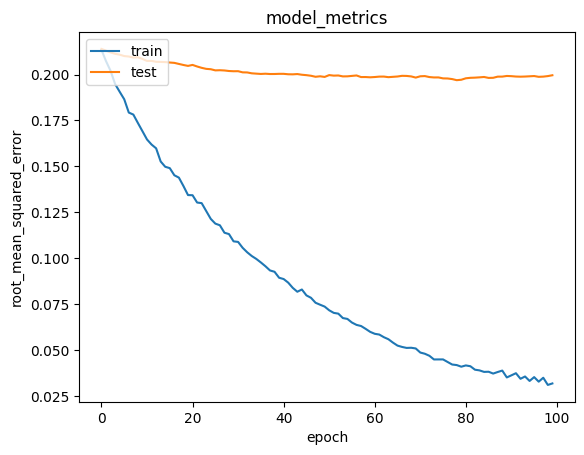

In [52]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
df = sampled_df

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
product_bought_by_user = df[df.user_id == user_id]

product_not_bought = df[~df['product_id'].isin(product_bought_by_user.product_id.values)]['product_id']
product_not_bought = list(
    set(product_not_bought)
    .intersection(set(product_to_product_encoded.keys()))
)

product_not_bought = [[product_to_product_encoded.get(x)] for x in product_not_bought]
user_encoder = user_to_user_encoded.get(user_id)
user_product_array = np.hstack(
    ([[user_encoder]] * len(product_not_bought), product_not_bought)
)

In [54]:
ratings = model.predict(user_product_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_product_ids = [
    product_encoded_to_product.get(product_not_bought[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Product with high ratings from user')
print('----' * 8)

top_product_user = (
    product_bought_by_user.sort_values(
        by = 'rating',
        ascending=False
    ).head(5).product_id.values)

product_df_rows = df[df['product_id'].isin(top_product_user)]
for row in df.itertuples():
    print(row.product_name, ':', row.category)

print('----' * 8)
print('Top 10 Product recommendation')
print('----' * 8)

recommended_product = df[df['product_id'].isin(recommended_product_ids)]
for row in recommended_product.itertuples():
    print(row.product_name, ':', row.category)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Showing recommendations for users: AFNCX33YXD6T4LAWBFYXN6RR7LZQ,AGOJ5KXS5VV6NQS3XHAGRDZ7S2BA,AFWEWWOEAAHDSL4SLZGRNGT57HDA,AFNGBQYXHSKNKA4E6M7RBIESDL2Q,AG52N6UOIS5XRAI7K6RRCGIIGGYA,AFNUG7NKSURNWMYX4JL5T7CL53XQ,AEDDSZIS6P2DL7Z4MHVXUKLW73QQ,AFFTXR2YGTS2NVJHQAAWSV7UNBPA
Product with high ratings from user
--------------------------------
xiaomi pad qualcomm snapdragon hz refresh rate gb gb k display inchcm billion colour dolby vision atmos quad speaker wifi gray : computersaccessories
skadioo wifi adapter pc car accessory wifi dongle pc usb wifi adapter pc wifi receiver ghz bgn unano size wifi dongle compatible adapterwifi dongle pc : computersaccessories
lohaya voice assistant remote compatible airtel xstream settop box remote control netflix function black non voice : electronics
popio tempered glass screen protector compatible iphone iphone pro case friendly edge edge coverage easy installation kit pack : electronics
tplink nano ac usb wifi adapter

## Hybrid Recommendation

In [55]:
# Compute the cosine similarity matrix based on the tfidf_matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Print the shape of the cosine similarity matrix to verify
cosine_sim.shape

(1465, 1465)

In [56]:
# Create a product-user matrix with overall product ratings
product_user_matrix = df.pivot_table(index='product_id', values='rating', aggfunc='mean')

#Fill missing values with the average rating
product_user_matrix = product_user_matrix.fillna(product_user_matrix.mean())

#Display the product-user matrix
product_user_matrix.head()

,rating
product_id,
B002PD61Y4,4.1
B002SZEOLG,4.2
B003B00484,4.3
B003L62T7W,4.3
B004IO5BMQ,4.5


In [57]:
def hybrid_recommendation(product_id, content_sim_matrix, product_user_matrix, products, top_n=10):
    #Get the index of the product that matches the product_id
    idx = products.index[products['product_id'] == product_id][0]

    #Content-based filtering
    #Get pairwise similarity scores
    sim_scores = list(enumerate(content_sim_matrix[idx]))
    #Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #Get the scores of the top N most similar products
    content_recommendations_idx = [i[0] for i in sim_scores[1:top_n+1]]

    #Collaborative Filtering
    #Get the rating of the current product
    if product_id in product_user_matrix.index:
        current_product_rating = product_user_matrix.loc[product_id].values[0]
        # Find products with similar ratings
        similar_rating_products = product_user_matrix.iloc[(product_user_matrix['rating']-current_product_rating).abs().argsort()[:top_n]]

    #Combine content and collaborative recommendations
    #Get indices for collaborative recommendations
    collaborative_recommendations_idx = similar_rating_products.index
    #Map indices to product IDs
    collaborative_recommendations_idx = [products.index[products['product_id'] == pid].tolist()[0] for pid in collaborative_recommendations_idx]

    #Combine indices from both methods and remove duplicates
    combined_indices = list(set(content_recommendations_idx + collaborative_recommendations_idx))

    #Get recommended products details
    recommended_products = products.iloc[combined_indices].copy()
    recommended_products = recommended_products[['product_id', 'product_name', 'category', 'rating']]

    return recommended_products

In [58]:
# Sample a single row from the DataFrame to get a sample product
sample_product_row = df[['product_id', 'product_name', 'category']].sample().iloc[0]

# Extract the product_id and product_name from the sampled row
sample_product_id_value = sample_product_row['product_id']
sample_product_name_value = sample_product_row['product_name']
sample_product_category_value = sample_product_row['category']

# Call the hybrid_recommendation function with the product_id value
recommended_products = hybrid_recommendation(sample_product_id_value, cosine_sim, product_user_matrix, df)

print("Recommendation for user who purchased product \"" + sample_product_name_value + "\"")
recommended_products.head(10)

Recommendation for user who purchased product "pigeon zest mixer grinder speed control watt powerful copper motor stainless steel jar dry grinding wet grinding making chutney polycarbonate lid blue"


,product_id,product_name,category,rating
1400,B07JZSG42Y,borosil prime grill sandwich maker grey,homekitchen,4.0
89,B07JH1C41D,wayona nylon braided pack lightning fast usb d...,computersaccessories,4.2
1435,B089BDBDGM,kuber industry waterproof round laundry bagham...,homekitchen,4.0
28,B09W5XR9RT,duracell usb c lightning apple certified mfi b...,computersaccessories,4.4
1085,B01M5B0TPW,borosil chef delite bchdbb watt chopper black,homekitchen,4.4
1300,B08BJN4MP3,hul pureit eco water saver mineral rouvmf wall...,homekitchen,4.4
499,B09LHYZ3GJ,redmi note g matte black gb ram gb rom dimensi...,electronics,4.1
577,B098QXR9X2,ambrane mah power bank w fast charging triple ...,electronics,4.1
482,B08K4RDQ71,tukzer capacitive stylus pen touch screen devi...,electronics,3.8
369,B07JW9H4J1,wayona nylon braided usb lightning fast chargi...,computersaccessories,4.2
